In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import lasio

las1=lasio.read(r"C:\Users\avina\Downloads\Well-Log Project\Gorgonichthys_1_suite3_supercombo_log.las")
las2=lasio.read(r"C:\Users\avina\Downloads\Well-Log Project\Gorgonichthys1_suite2_CMR_NUC_MAINLOG.las")

In [12]:
print(las1.sections['Curves'])

Mnemonic  Unit  Value  Description                               
--------  ----  -----  -----------                               
DEPTH     M            DEPTH (BOREHOLE)                          
AT10      OHMM         Array Induction Two Foot Resistivity A10  
AT20      OHMM         Array Induction Two Foot Resistivity A20  
AT30      OHMM         Array Induction Two Foot Resistivity A30  
AT60      OHMM         Array Induction Two Foot Resistivity A60  
AT90      OHMM         Array Induction Two Foot Resistivity A90  
CALI      IN           Caliper                                   
DRHO      G/C3         Bulk Density Correction                   
DT2       US/F         Delta-T Shear - Upper Dipole              
DTCO      US/F         Delta-T Compressional                     
DTSM      US/F         Delta-T Shear                             
GR        GAPI         Gamma Ray                                 
PEF                    Photoelectric Factor                      
PR        

In [13]:
print(las2.sections['Curves'])

Mnemonic  Unit  Value  Description                              
--------  ----  -----  -----------                              
DEPTH     M            DEPTH (BOREHOLE)                         
DRHO      G/C3         Bulk Density Correction                  
PEF                    Photoelectric Factor                     
RHOB      G/C3         Bulk Density                             
CALI      IN           Caliper                                  
TNPH      V/V          Thermal Neutron Porosity                 
NPHI      V/V          Thermal Neutron Porosity (Ratio Method)  
CNTC      HZ           Corrected Near Thermal Counting Rate     
CFTC      HZ           Corrected Far Thermal Counting Rate      
GR        GAPI         Gamma Ray                                
T2LM      MS           T2 Logarithmic Mean                      
CMRP_3MS  V/V          CMR 3ms Porosity                         
TCMR      V/V          Total CMR Porosity                       
KTIM      MD           Pe

In [15]:
well1=las1.df()
well2=las2.df()

In [16]:
well1=well1.reset_index()
well2=well2.reset_index()
print(min(well1['DEPTH']))
print(max(well1['DEPTH']))

3909.06
4775.7588


In [6]:
'''creating a new dataframe for depth range(3950,4150) ; Upper Vulcan Formation'''

import pandas as pd
DEPTH,CALI=[],[]
GR,RHOB=[],[]
SPHI,RT=[],[]
DTCO,DTSM=[],[]
NPHI=[]
AT10=[]
AT90=[]

for i in range(len(well1.DEPTH)):
    if well1.DEPTH[i]>=3910 and well1.DEPTH[i]<=4145:
        DEPTH.append(well1.DEPTH[i])
        CALI.append(well1.CALI[i])
        GR.append(well1.GR[i])
        RHOB.append(well1.RHOB[i])
        SPHI.append(well1.SPHI[i])
        RT.append(well1.RT[i])
        DTCO.append(well1.DTCO[i])
        DTSM.append(well1.DTSM[i])
        AT10.append(well1.AT10[i])
        AT90.append(well1.AT90[i])
        
for i in range(len(well2.DEPTH)):
    if well2.DEPTH[i]>=3910 and well2.DEPTH[i]<=4145:
        NPHI.append(well2.NPHI[i])

df=pd.DataFrame(zip(DEPTH,CALI,GR,RHOB,NPHI,SPHI,RT,DTCO,DTSM,AT10,AT90),columns=('DEPTH','CALI','GR','RHOB','NPHI','SPHI','RT','DTCO','DTSM','AT10','AT90'))   
print(df)

          DEPTH   CALI       GR   RHOB   NPHI   SPHI        RT    DTCO  \
0     4144.9752  8.670  145.561  2.711  0.204  0.137     6.408  71.653   
1     4144.8228  8.677  149.755  2.635  0.204  0.145     6.797  72.886   
2     4144.6704  8.719  148.626  2.620  0.204  0.161     7.301  75.371   
3     4144.5180  8.722  147.858  2.651  0.204  0.161     7.904  75.503   
4     4144.3656  8.779  148.879  2.673  0.204  0.154     8.578  74.240   
...         ...    ...      ...    ...    ...    ...       ...     ...   
1484  3918.8136  8.521   75.516  2.025  0.272 -0.032  1719.090  53.258   
1485  3918.6612  8.525   76.919  2.024  0.290 -0.034  1950.000  53.132   
1486  3918.5088  8.519   77.223  2.007  0.278 -0.033  1950.000  53.182   
1487  3918.3564  8.530   74.072  2.002  0.289 -0.036  1654.394  52.924   
1488  3918.2040  8.523   75.984  1.986  0.289 -0.037  1226.871  52.840   

         DTSM      AT10    AT90  
0     145.766     4.753   6.885  
1     144.019     4.771   7.688  
2     139

In [17]:
out_dep = []
out_points = []
for i in range(len(df['GR'])):
    if df['GR'][i] == 192.391 or df['GR'][i] == 184.397 or df['GR'][i] ==190.704:
        out_dep.append(df['DEPTH'][i])
        out_points.append(df['GR'][i])

C:\Users\avina\AppData\Local\Temp\ipykernel_17784\214575640.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,5), (0,0) ,rowspan=1 , colspan=1)


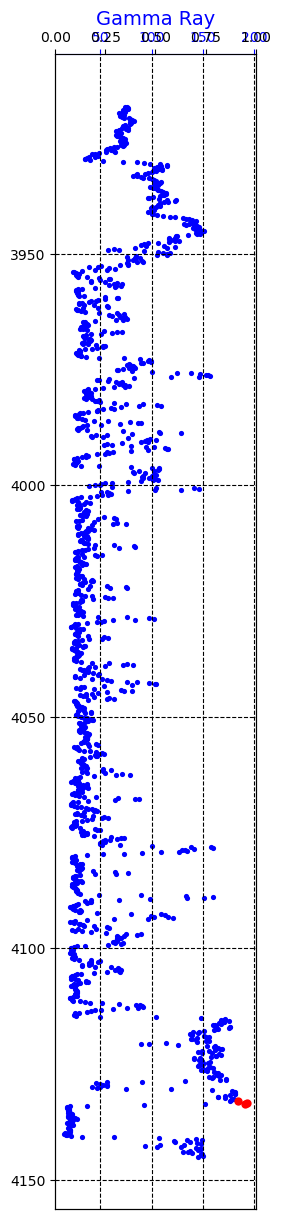

In [8]:
fig,axes=plt.subplots(figsize=(15,15))
#set up plot axes
ax1=plt.subplot2grid((1,5), (0,0) ,rowspan=1 , colspan=1)
ax11=ax1.twiny()
ax1.scatter(df['GR'],df['DEPTH'],s=5, color='b', lw=1.5)
ax1.scatter(out_points,out_dep,s=20, color='r', lw=1.5)
ax1.invert_yaxis()
ax1.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Gamma Ray',color='b', fontsize=14)
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

import plotly.express as px
fig=px.histogram(df,x='RHOB', marginal='box', nbins=47,title='Gamma Ray',width=500,height=400)
fig.update_layout(bargap=0.1)
fig.show()


## Q. No. 3

C:\Users\avina\AppData\Local\Temp\ipykernel_17784\3671080986.py:48: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


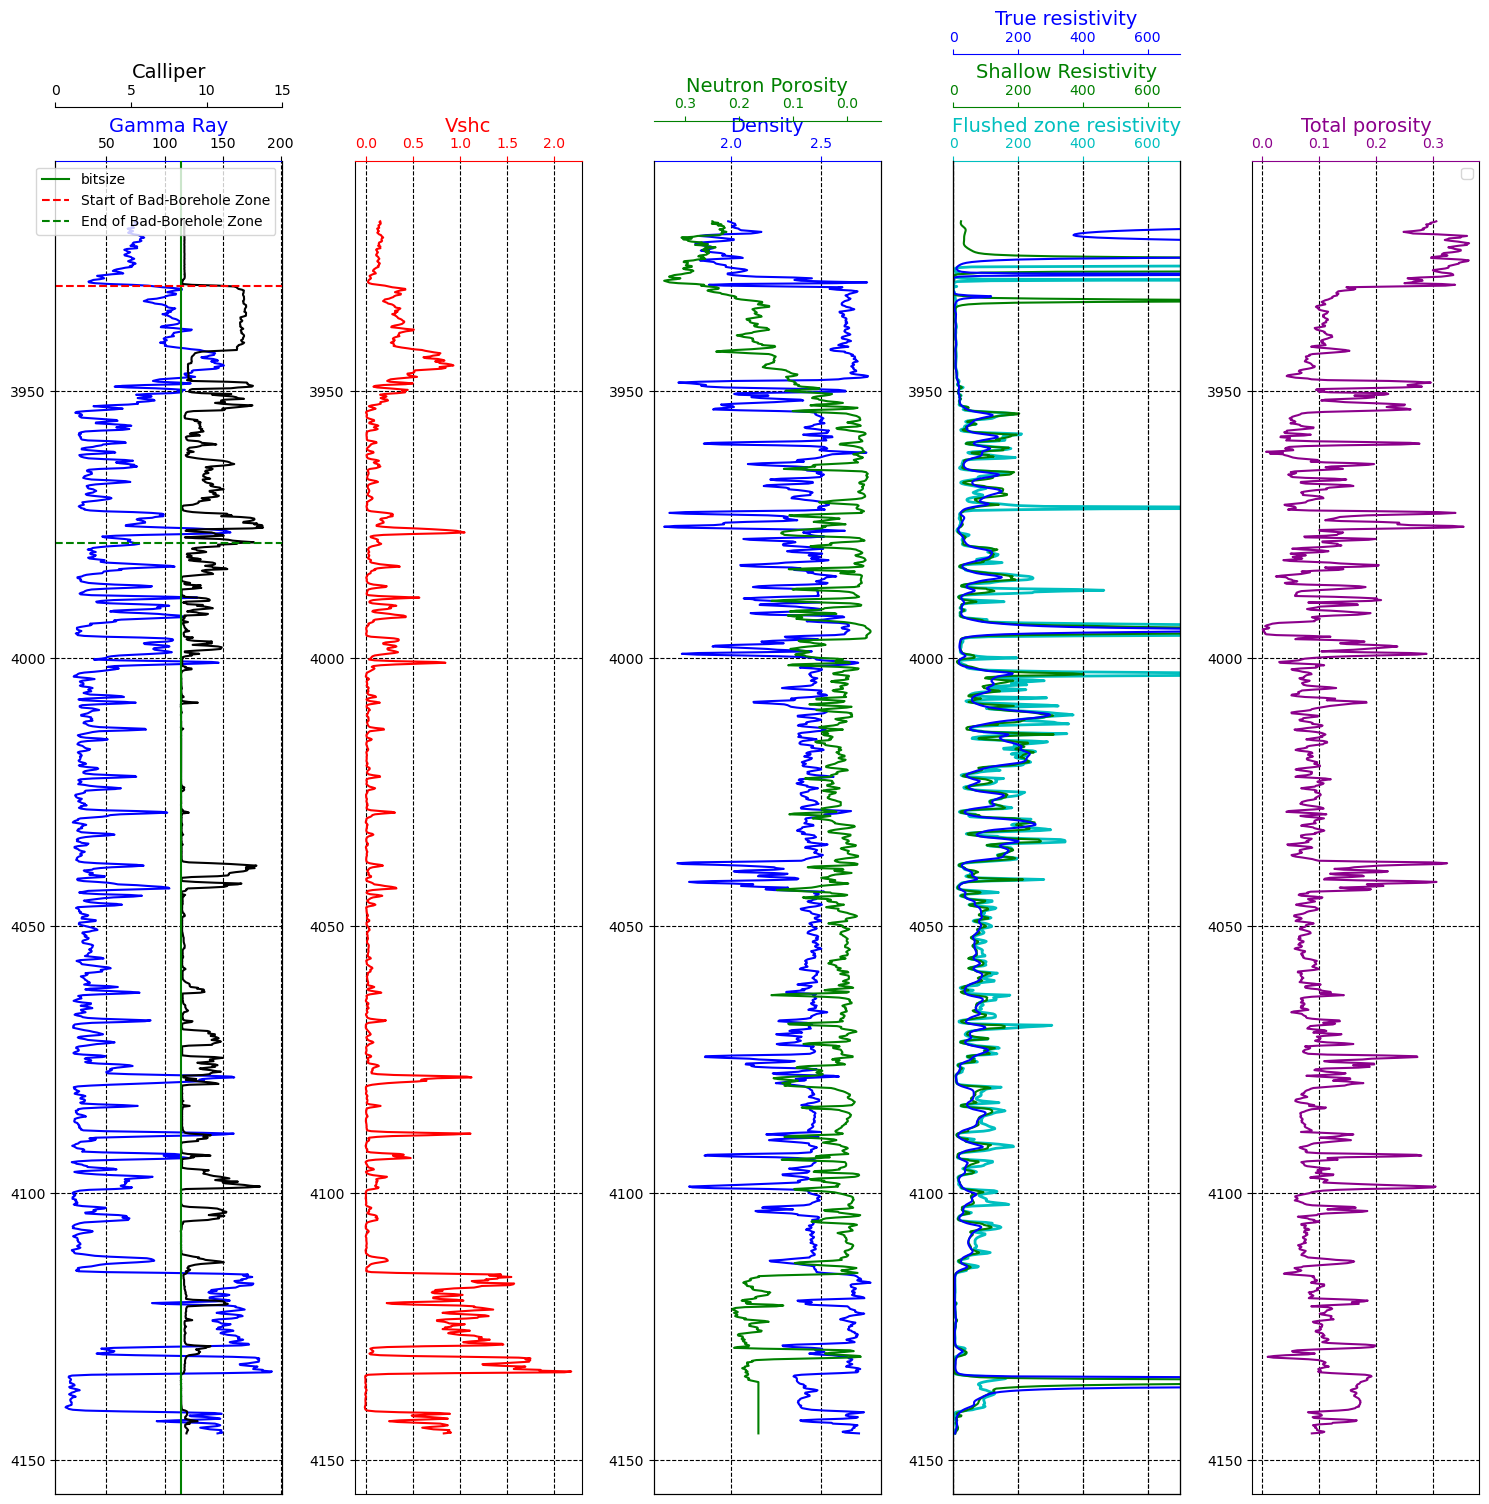

In [9]:
'''Neutron porosity(NPHI) correction'''
NPHI=df['NPHI']-0.04       #Sandstone correction factor
'''Density porosity(DPHI) calculation'''
Psa=2.65    # density of sandstones
Pshc=2.7    # density of shale
Pfl=1       #fluid density
DPHI=(Psa-df['RHOB'])/(Psa-Pfl)

'''Gas Correction for DPHI'''
DPHI=DPHI*0.8        #Correction for gas bearing sandstone 

'''volume of shale (Vshc) calculation'''
# Age of rock= Early Cretaceous
p05=df.GR.quantile(0.05)
p95=df.GR.quantile(0.95)
Igr=(df['GR']-p05)/(p95-p05)    # gamma ray index
Vshc = 0.083*(2**(3.7*Igr)-1)   # Vshc calculation for young tertiary rocks

'''Total Porosity calculation'''
TPHI1=((df['NPHI']**2+DPHI**2)/2)**0.5   #for gas bearing formations
TPHI2=(df['NPHI']+DPHI)/2                #for oil, water bearing formations
TPHI=[]
DEPT=[]
d=[]

for i in range(len(df['DEPTH'])):
    d.append(df['DEPTH'][i])
    

#Correcting TPHI for gas regions by considering rms of NPHI and DPHI ,else the average only
for i in range(len(d)):
    if (d[i] >=3930 and d[i] <=3949) or (d[i] >=3996 and d[i]<=4000) or (d[i]>=4114 and d[i]<=4134) or (d[i]>=4140 and d[i]<=4149) or (d[i]>=4076 and d[i]<=4078):
        TPHI.append((df['NPHI'][i]+DPHI[i])/2)     
    else:
        TPHI.append(((df['NPHI'][i]**2+DPHI[i]**2)/2)**0.5)

#temp = [i for i in TPHI[:5]]            
#print(temp)
    

m=3930.396    
n=3978.402    
bitsize=8.306        
   
'''Plot'''
fig,axes=plt.subplots(figsize=(15,15))
#set up plot axes
ax1=plt.subplot2grid((1,5) , (0,0) ,rowspan=1 , colspan=1)
ax11=ax1.twiny()
ax2=plt.subplot2grid((1,5) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,5) , (0,2) ,rowspan=1, colspan=1)
ax31=ax3.twiny()
ax4=plt.subplot2grid((1,5) , (0,3) ,rowspan=1 , colspan=1)
ax41=ax4.twiny()
ax42=ax4.twiny()
ax5=plt.subplot2grid((1,5) , (0,4) ,rowspan=1 , colspan=1)

#set up indvidual log tracks/ subplots
ax1.plot(df['GR'],df['DEPTH'], color='b', lw=1.5)
ax1.invert_yaxis()
ax2.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Gamma Ray',color='b', fontsize=14)
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax11.plot(df['CALI'],df['DEPTH'], color='k', lw=1.5)
ax11.set_xlim(0,15)
ax11.axvline(x=bitsize,color='g',label='bitsize')
ax11.axhline(y=m,color='r',label='Start of Bad-Borehole Zone', ls='--')
ax11.axhline(y=n,color='g',label='End of Bad-Borehole Zone', ls='--')
ax11.legend()
ax11.axvline(p05,color='g',label='p05')
ax11.axvline(p95,color='g',label='p95')
ax11.spines['top'].set_position(("axes", 1.04))
ax11.xaxis.set_ticks_position('top')
ax11.set_xlabel('Calliper',fontsize=14)
ax11.xaxis.set_label_position('top')

ax2.plot(Vshc,df['DEPTH'], color='r', lw=1.5)
ax2.invert_yaxis()
ax2.tick_params(axis='x', colors='r')
ax2.spines['top'].set_edgecolor('r')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Vshc',color='r', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax3.plot(df['RHOB'], df['DEPTH'], color='b', lw=1.5)
ax3.invert_yaxis()
ax3.tick_params(axis='x', colors='b')
ax3.spines['top'].set_edgecolor('b')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Density',color='b', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax31.plot(NPHI,df['DEPTH'], color='g', lw=1.5)
ax31.invert_xaxis()
ax31.tick_params(axis='x', colors='g')
ax31.spines['top'].set_edgecolor('g')
ax31.spines['top'].set_position(("axes", 1.03))
ax31.set_xlabel('Neutron Porosity',color='g', fontsize=14)
ax31.xaxis.set_label_position('top')      
    
    
ax4.plot(df['AT10'],df['DEPTH'], color='c', lw=2)
ax4.invert_yaxis()
ax4.set_xlim(0,700)
ax4.tick_params(axis='x', colors='c')
ax4.spines['top'].set_edgecolor('c')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Flushed zone resistivity',color='c', fontsize=14)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax41.plot(df['AT90'],df['DEPTH'], color='g', lw=1.5)
ax41.invert_yaxis()
ax41.set_xlim(0,700)
ax41.tick_params(axis='x', colors='g')
ax41.spines['top'].set_edgecolor('g')
ax41.spines['top'].set_position(("axes", 1.04))
ax41.set_xlabel('Shallow Resistivity',color='g',fontsize=14)
ax41.xaxis.set_label_position('top')
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax42.plot(df['RT'],df['DEPTH'], color='b', lw=1.5)
ax42.set_xlim(0,700)
ax42.invert_yaxis()
ax42.spines['top'].set_edgecolor('b')
ax42.spines['top'].set_position(("axes", 1.08))
ax42.tick_params(axis='x', colors='b')
ax42.set_xlabel('Res_Flag',color='b', fontsize=14)
ax42.set_xlabel('True resistivity')
ax42.xaxis.set_label_position('top')
ax42.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax5.plot(TPHI,df['DEPTH'], color='darkmagenta', lw=1.5)
ax5.invert_yaxis()
ax5.tick_params(axis='x', colors='darkmagenta')
ax5.spines['top'].set_edgecolor('darkmagenta')
ax5.xaxis.set_ticks_position('top')
ax5.set_xlabel('Total porosity',color='darkmagenta', fontsize=14)
ax5.xaxis.set_label_position('top')
ax5.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax5.legend()
plt.tight_layout()


In [10]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.03,column_widths=[2,2,2],row_heights=[300],print_grid=True)

fig.add_trace(go.Scatter(x=df.GR, y=df.DEPTH, line=dict(width=0.5, color='blue'), name='Gamma Ray'), row=1, col=1)
fig.update_xaxes(title='Gamma Ray', range=[0, 300], row=1, col=1)
fig.update_yaxes(title='Depth (m)', autorange='reversed', row=1, col=1)

fig.add_trace(go.Scatter(x=df.RHOB, y=df.DEPTH, line=dict(width=0.5, color='green'), name='RHOB'), row=1, col=2)
fig.update_xaxes(title='Bulk Density(API)', row=1, col=2)

fig.add_trace(go.Scatter(x=df.RT, y=df.DEPTH, line=dict(width=0.5, color='blue'), name='True Resistivity'), row=1, col=3)
fig.update_layout(width=800,height=1200)

fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



## Q. No. 4

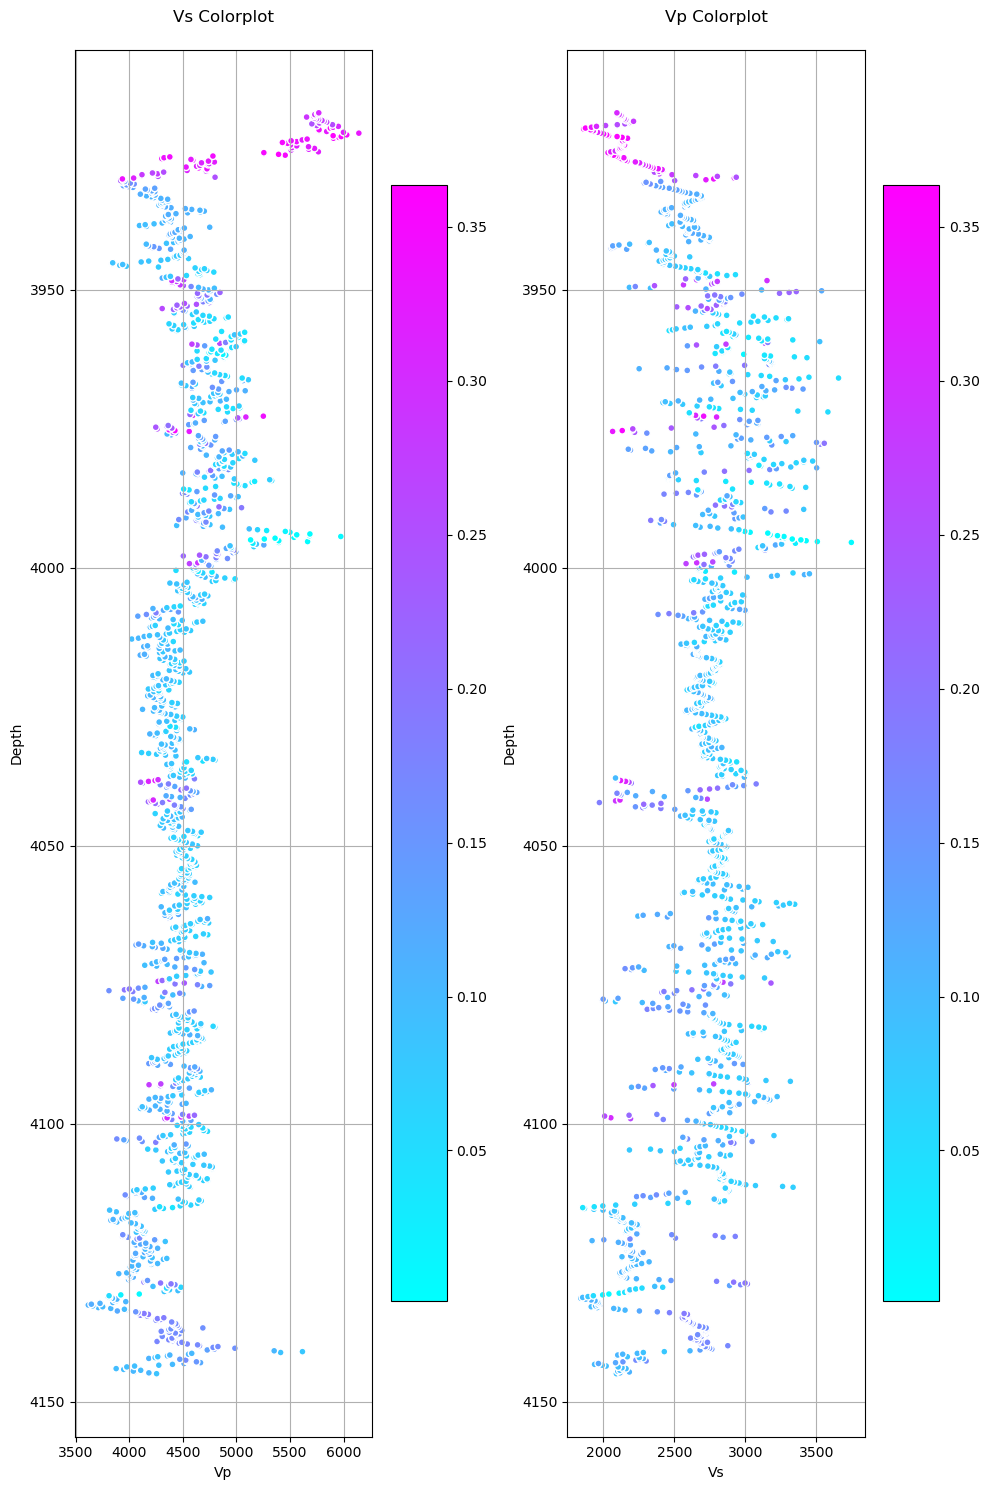

In [11]:
# N-D cross-plot generation; where color represent variation of GR value
Vp=304800/df['DTCO']      # P-Wave Velocity
Vs=304800/df['DTSM']      #S-Wave Velocity
plt.figure(figsize=(10,15))

a=min(TPHI)
b=max(TPHI)
c=Vshc.min()
d=Vshc.max()

plt.subplot(1,2,1)
plt.scatter(Vp,df.DEPTH, c = TPHI, marker='o', s=25, edgecolors='w', cmap='cool', vmin=a, vmax=b)
plt.xlabel('Vp'); plt.ylabel('Depth'); plt.gca().invert_yaxis() ;plt.grid(True)
plt.colorbar(); plt.title('Vs Colorplot', pad=20); 

plt.subplot(1,2,2)
plt.scatter(Vs,df.DEPTH, c = TPHI, marker='o', s=25, edgecolors='w', cmap='cool', vmin=a, vmax=b)
plt.xlabel('Vs'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
plt.colorbar(); plt.title('Vp Colorplot', pad=20); 

plt.tight_layout()

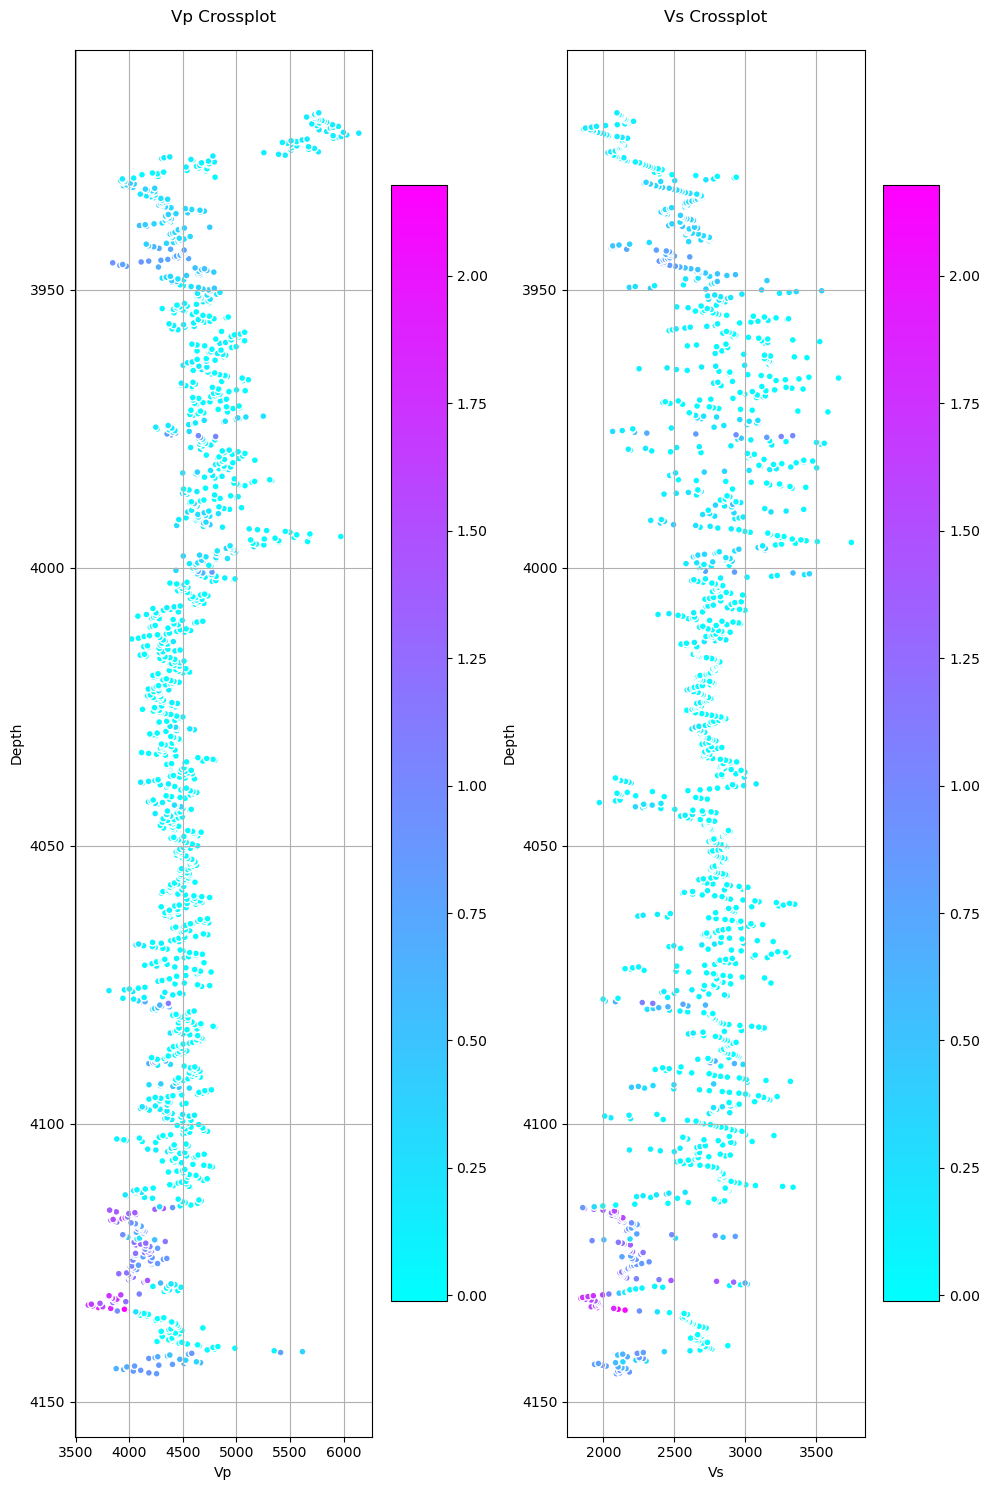

In [12]:
plt.figure(figsize=(10,15))

plt.subplot(1,2,1)
plt.scatter(Vp,df.DEPTH, c = Vshc, marker='o', s=25, edgecolors='w', cmap='cool', vmin=c, vmax=d)
plt.xlabel('Vp'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
plt.colorbar(); plt.title('Vp Crossplot', pad=20); 

plt.subplot(1,2,2)
plt.scatter(Vs,df.DEPTH, c = Vshc, marker='o', s=25, edgecolors='w', cmap='cool', vmin=c, vmax=d)
plt.xlabel('Vs'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
plt.colorbar(); plt.title('Vs Crossplot', pad=20); 

plt.tight_layout()

## Q. No. 5

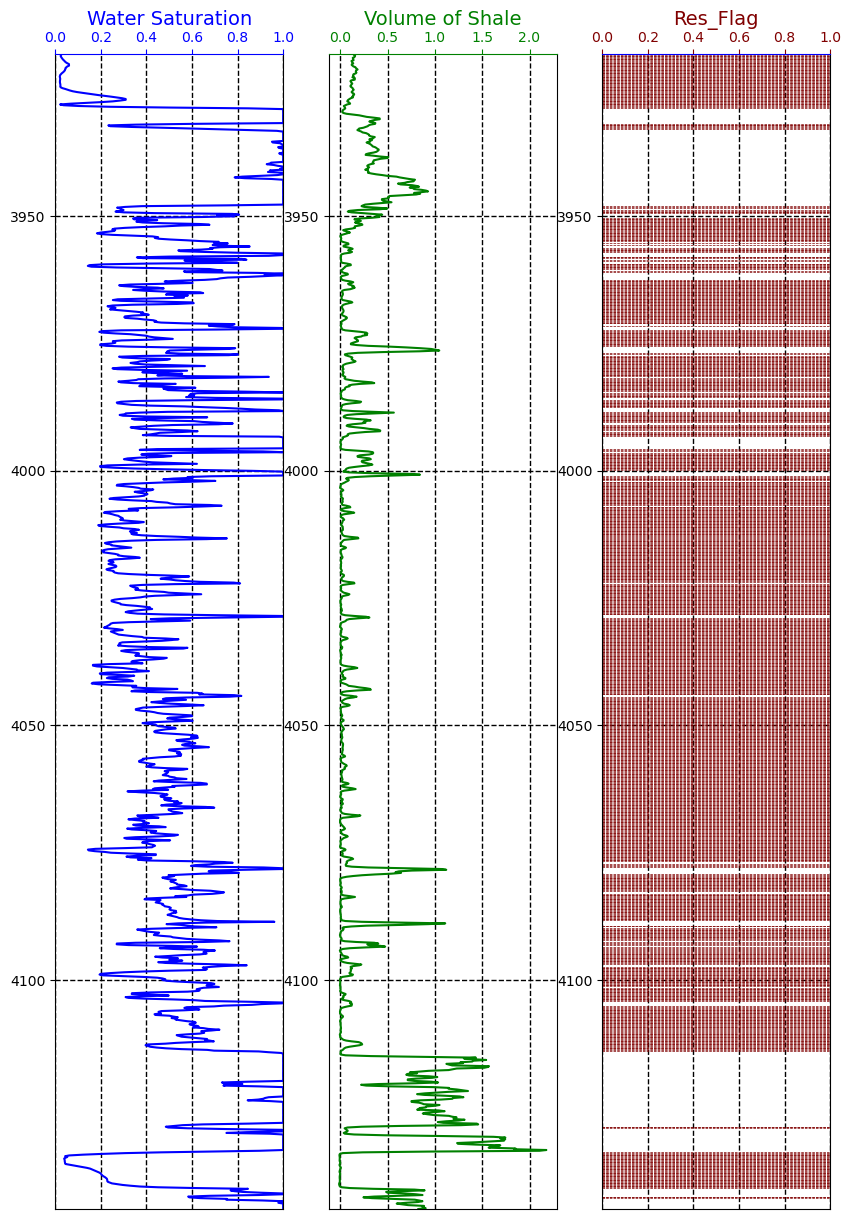

In [13]:
a=1
m=2
n=2
Rw=0.1
Res_Flag=[]
dff=pd.DataFrame(zip(TPHI))
dff.rename(columns={0:'TPHI'},inplace=True) 

'''Water Saturation calculation'''

Sw=(a*Rw/(df['RT']*dff['TPHI']**m))**(1/n)  #Archie's Formula of Water Saturation

# Exceeding Sw values greater than 1 are set to 1
for i in range(len(Sw)):
    if Sw[i]>1:
        Sw[i]=1

# Reservoir Characterization
for i in range(len(df['DEPTH'])):
    if Vshc[i] <= 0.4 and Sw[i] <= 0.7:
        Res_Flag.append(1)
    else:
        Res_Flag.append(0)
        
plt.subplots(figsize=(10,15))        
#set up plot axes
ax1=plt.subplot2grid((1,3) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,3) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,3) , (0,2) ,rowspan=1, colspan=1)
    
#set up indvidual log tracks/ subplots
ax1.plot(Sw,df['DEPTH'], color='b', lw=1.5)
ax1.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax1.set_xlim(0,1)
ax1.tick_params(axis='x', colors='b')
ax1.set_xlabel('Res_Flag',color='b', fontsize=14)
ax1.invert_yaxis()
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Water Saturation')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=1)

ax2.plot(Vshc,df['DEPTH'], color='g', lw=1.5)
ax2.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('g')
ax2.tick_params(axis='x', colors='g')
ax2.set_xlabel('Res_Flag',color='g', fontsize=14)
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=1)

for i in range(len(Res_Flag)):
    if Res_Flag[i]==1:
       
        ax3.axhline(y=df['DEPTH'][i],color='maroon',label='Res_Flag',lw=0.5,ls='--')
ax3.spines['top'].set_edgecolor('b')
ax3.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax3.xaxis.set_ticks_position('top')
ax3.tick_params(axis='x', colors='maroon')
ax3.set_xlabel('Res_Flag',color='maroon', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=1)
ax3.invert_yaxis()

## Q. No. 6

NameError: name 'Sw1' is not defined

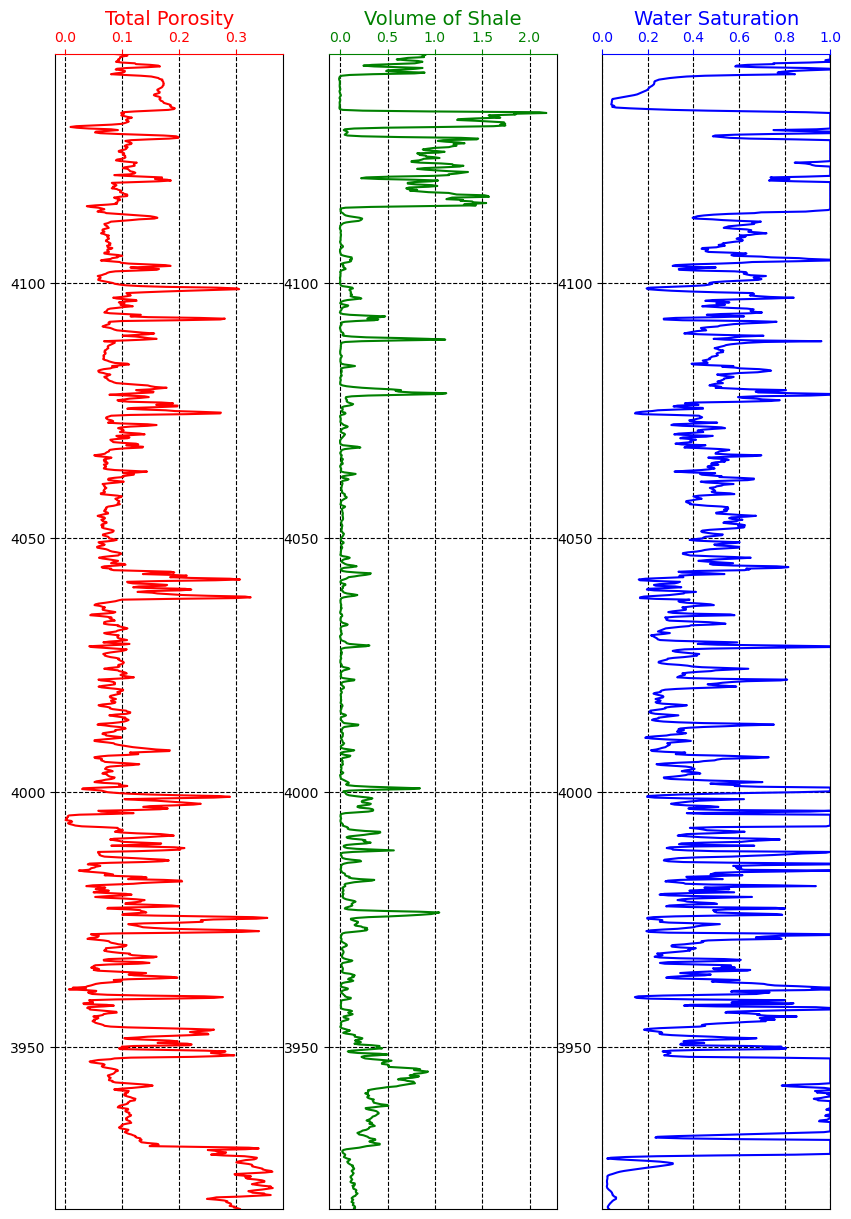

In [14]:

plt.figure(figsize=(10,15))        
#set up plot axes
ax1=plt.subplot2grid((1,3) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,3) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,3) , (0,2) ,rowspan=1, colspan=1)
    
#set up indvidual log tracks/ subplots
ax1.plot(TPHI,df['DEPTH'], color='r', lw=1.5)
ax1.spines['top'].set_edgecolor('r')
ax1.tick_params(axis='x', colors='r')
ax1.set_xlabel('Res_Flag',color='r', fontsize=14)
ax1.invert_yaxis()
ax1.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Total Porosity')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax2.plot(Vshc,df['DEPTH'], color='g', lw=1.5)
ax2.tick_params(axis='x', colors='g')
ax2.set_xlabel('Res_Flag',color='g', fontsize=14)
ax2.invert_yaxis()
ax2.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax2.spines['top'].set_edgecolor('g')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax3.plot(Sw,df['DEPTH'], color='b', lw=1.5)
ax3.set_xlim(0,1)
ax3.tick_params(axis='x', colors='b')
ax3.set_xlabel('Res_Flag',color='b', fontsize=14)
ax3.invert_yaxis()
ax3.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax3.spines['top'].set_edgecolor('b')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Water Saturation')
ax3.xaxis.set_label_position('top')
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

df1=pd.DataFrame(zip(Vshc,Sw1,TPHI), columns=('Vshc', 'Sw', 'TPHI'))
df1.describe()
